<a href="https://colab.research.google.com/github/KeerthanaBanisetty/yamato/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df=pd.read_csv('/content/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

In [8]:
df.drop('Id',axis=1,inplace=True)

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

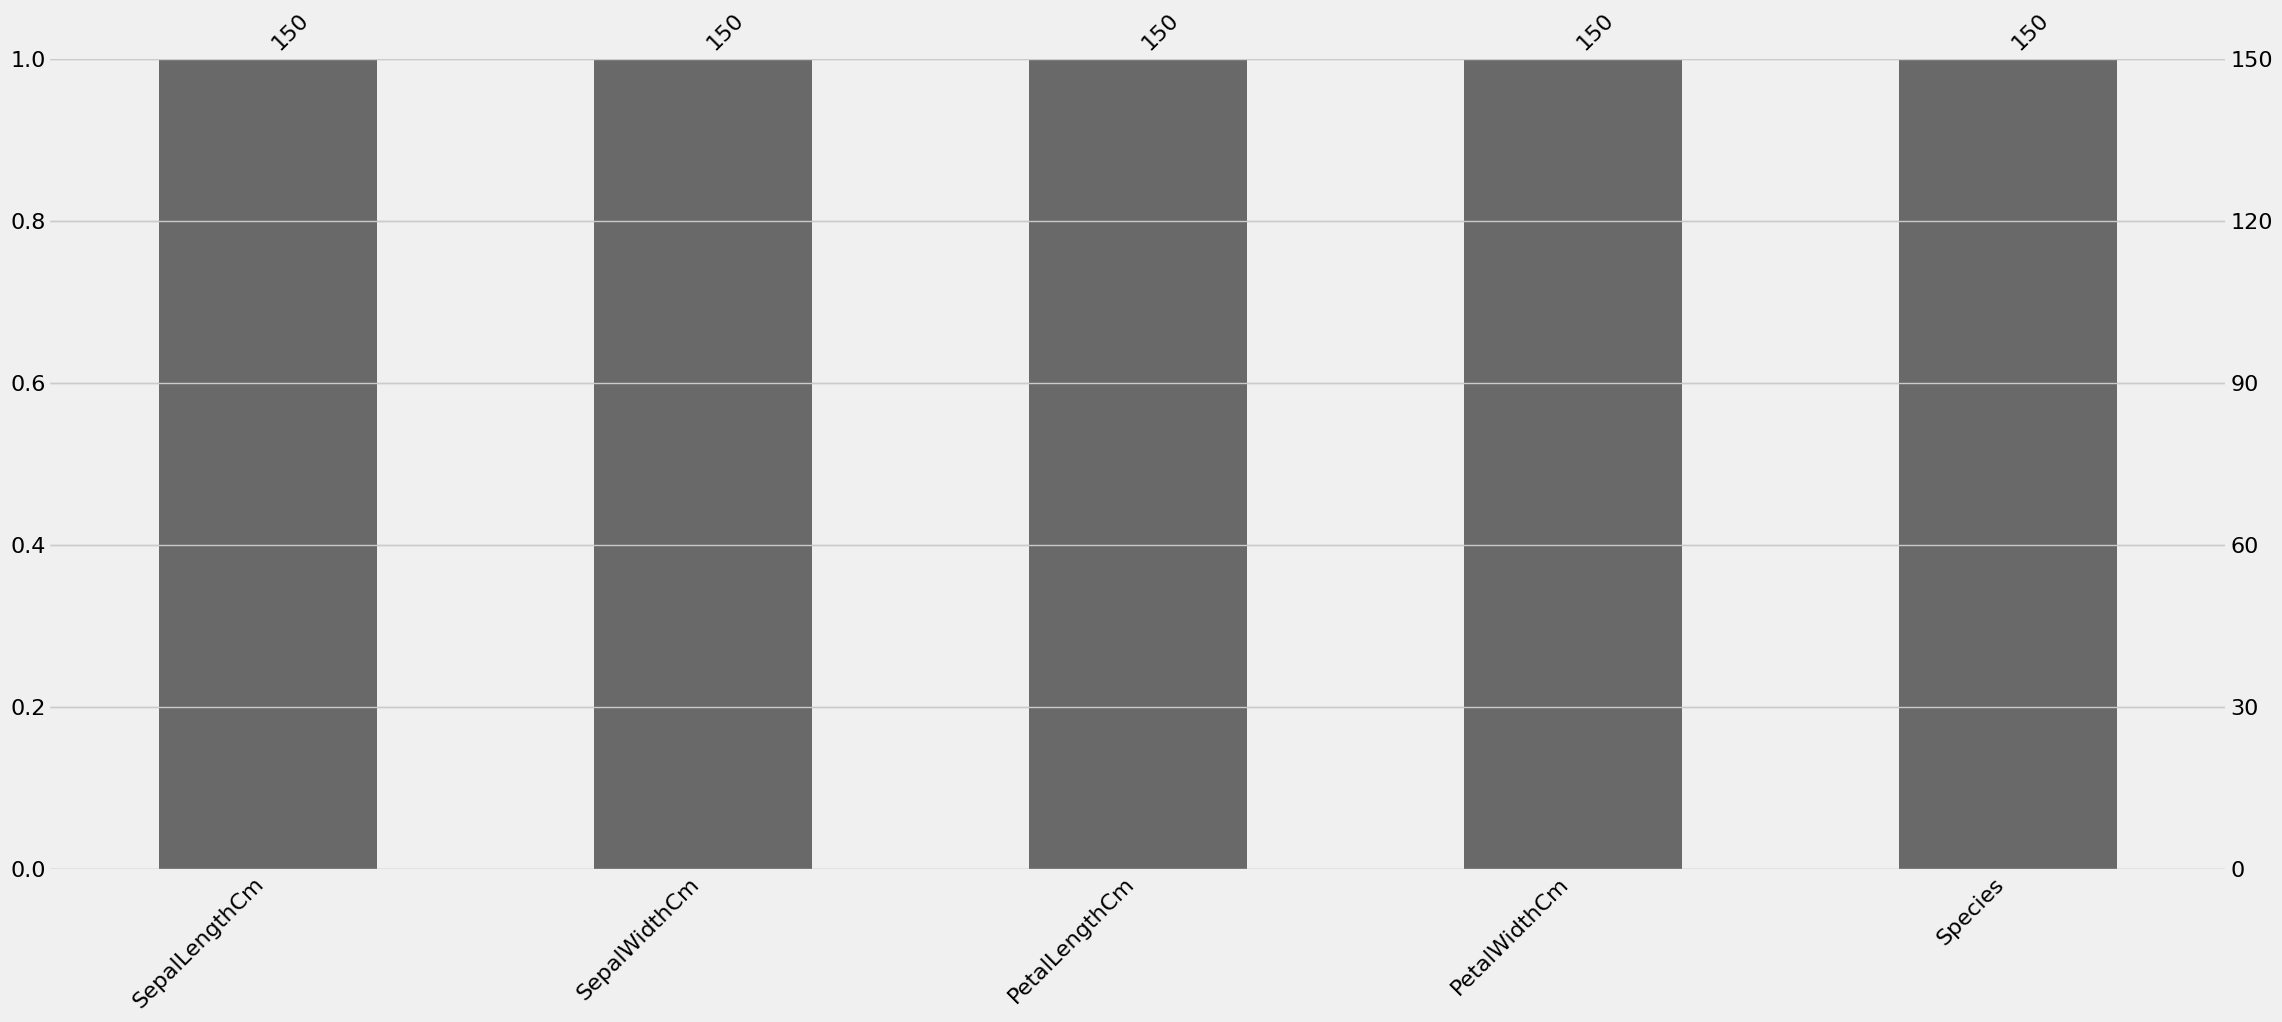

In [11]:
import missingno as msno
msno.bar(df)

In [12]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

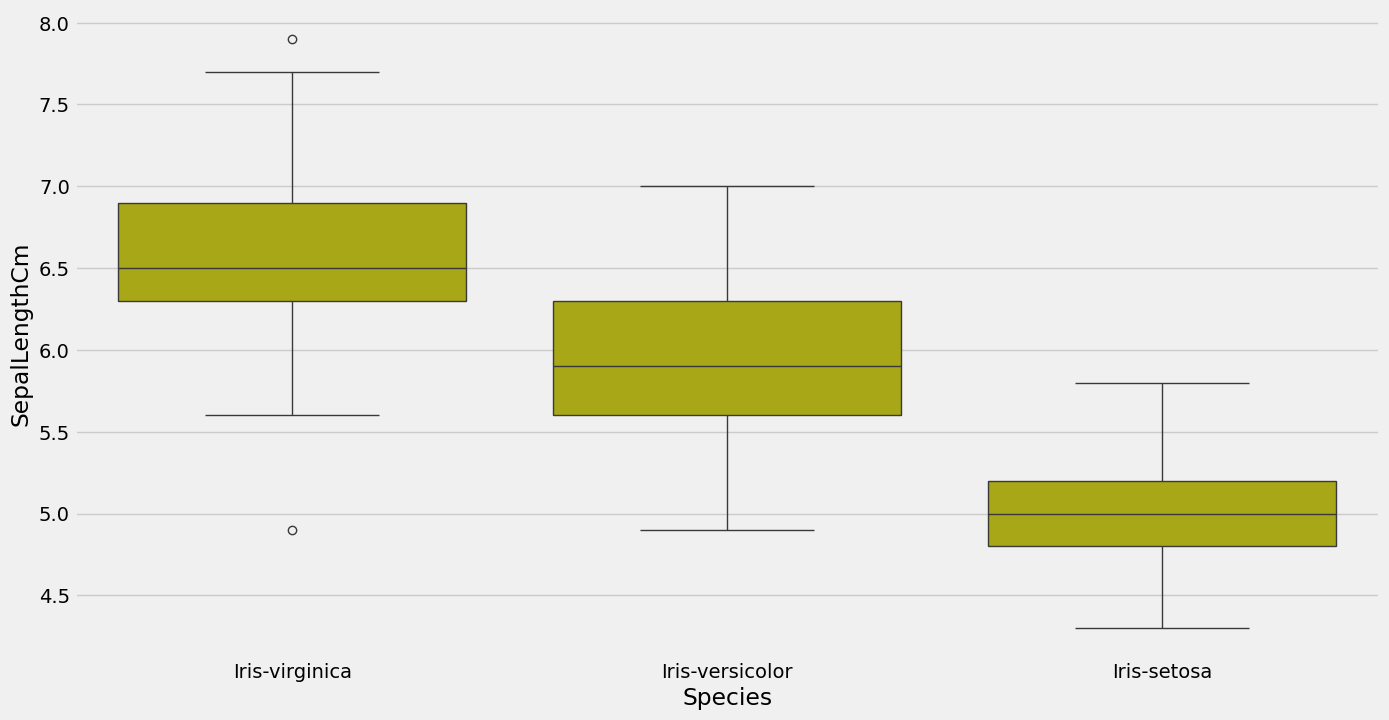

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',color='y',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

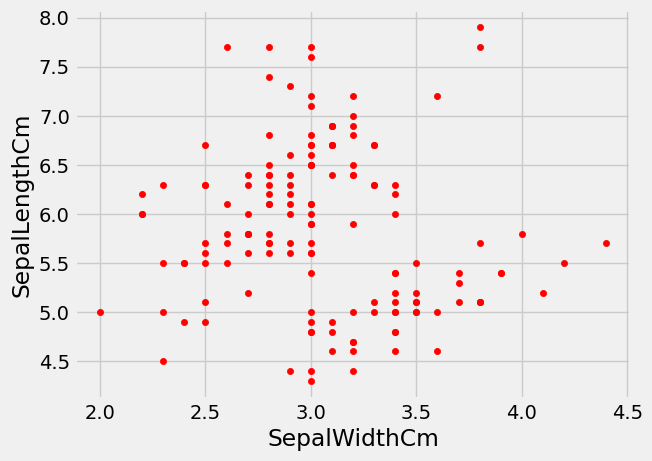

In [16]:
df.plot(kind='scatter',x='SepalWidthCm',color='red',y='SepalLengthCm')

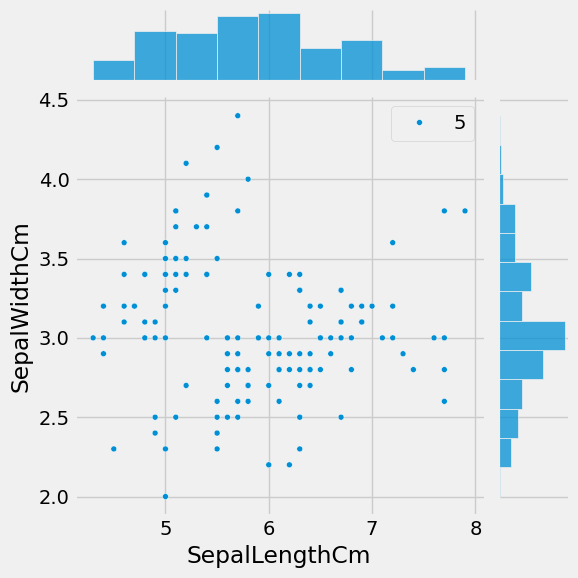

In [17]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

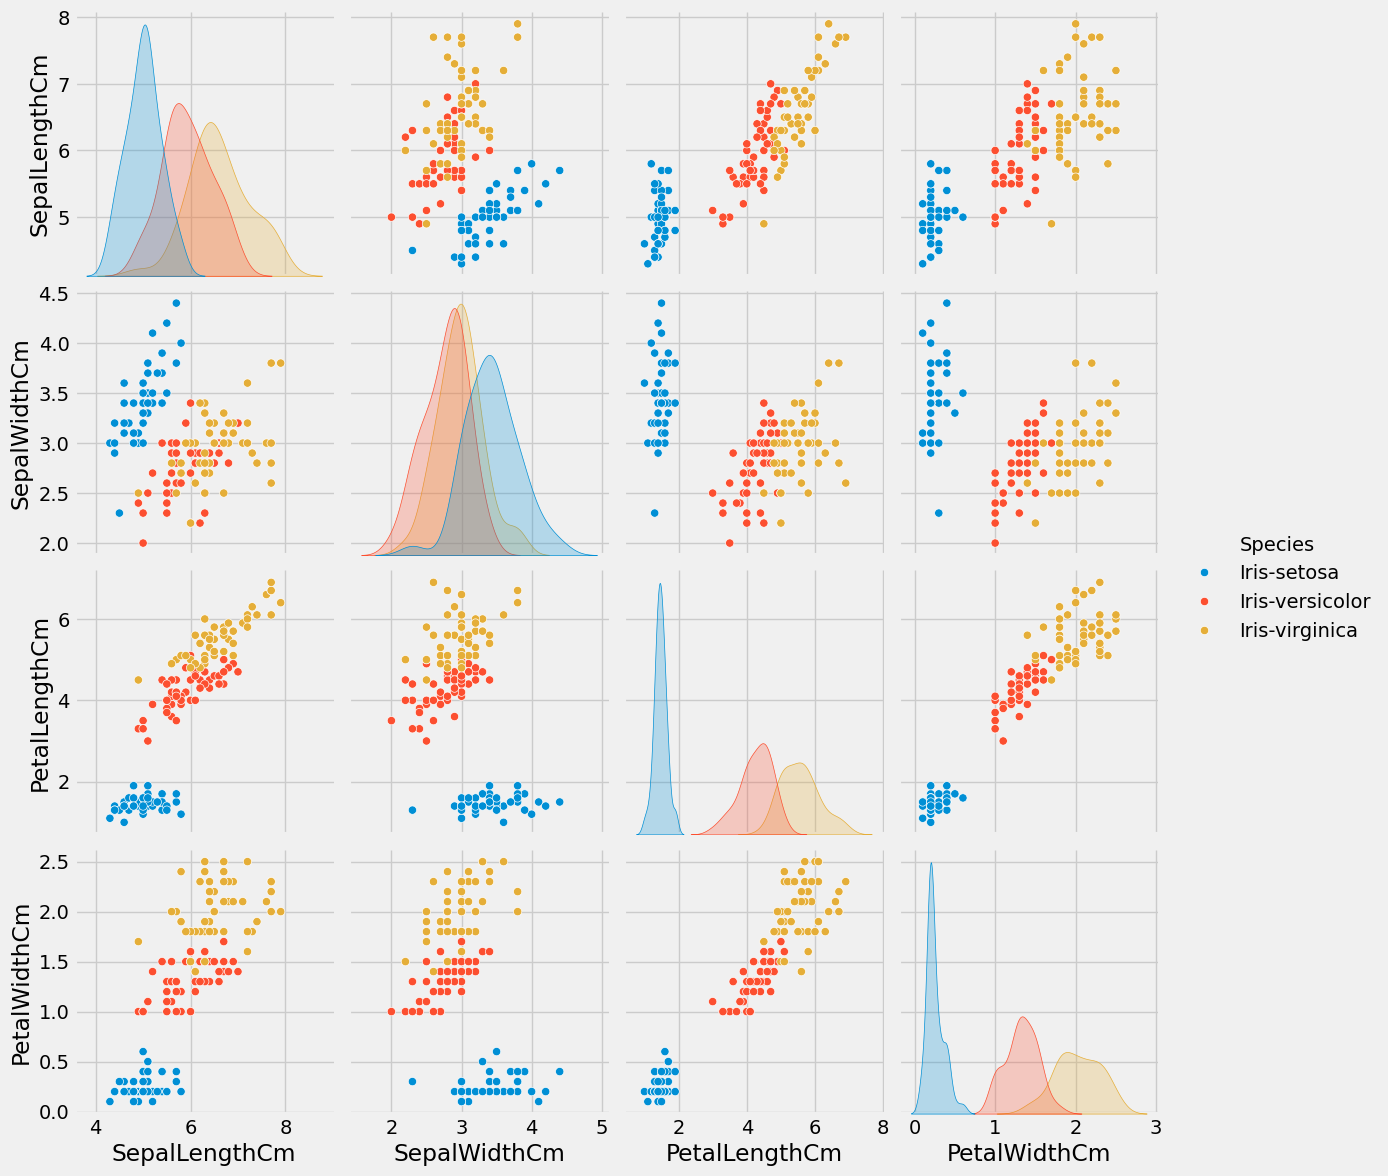

In [18]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

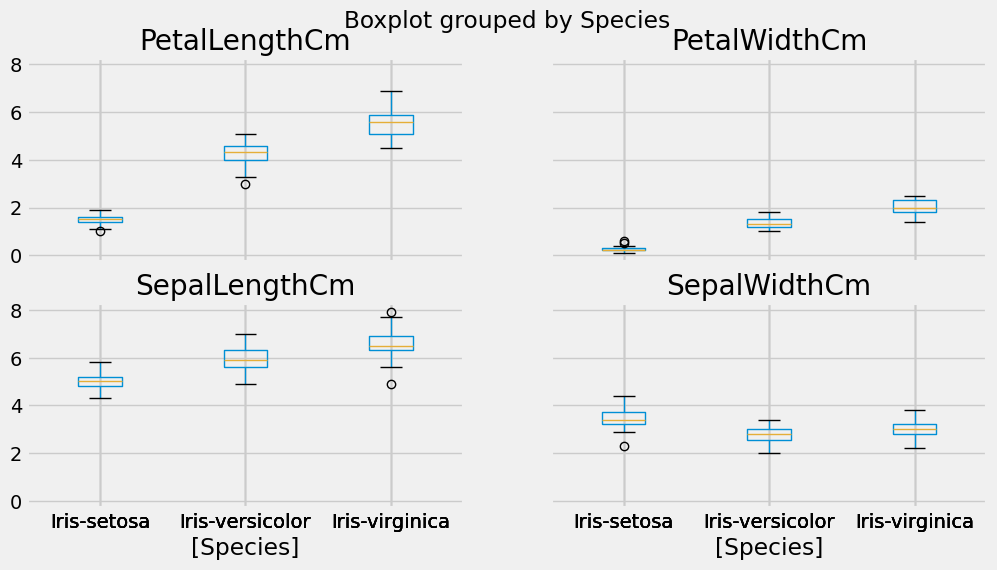

In [19]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

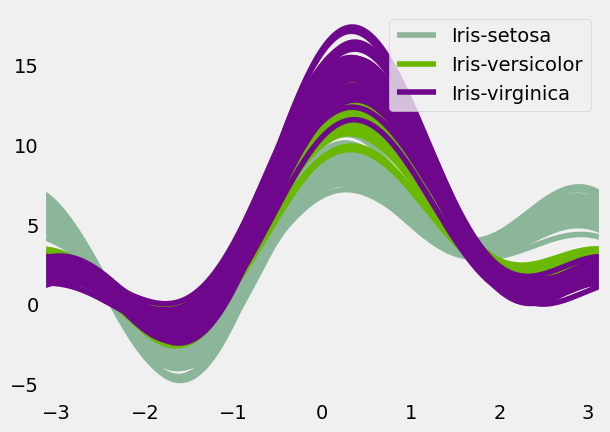

In [20]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

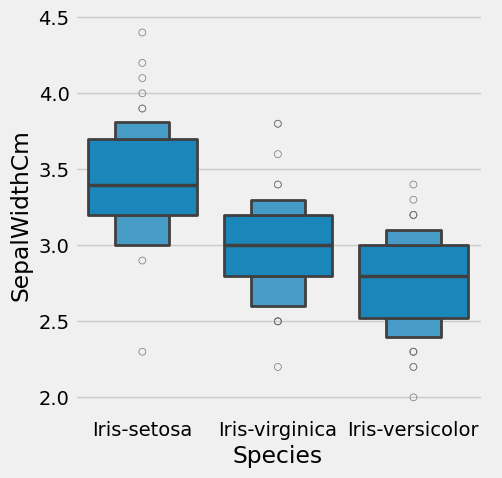

In [21]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

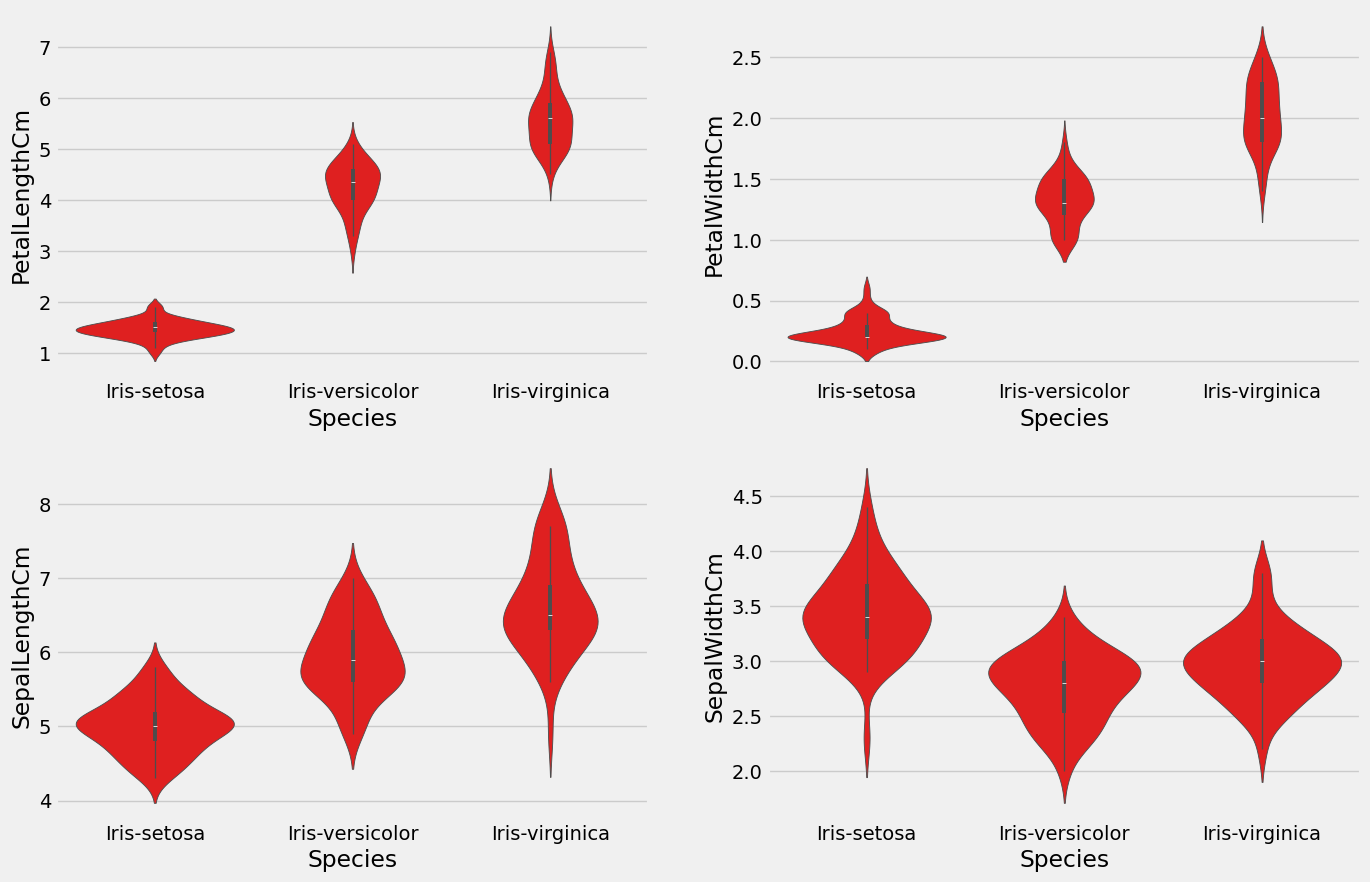

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',color='red',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',color='red',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',color='red',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',color='red',data=df)

In [24]:
X=df.drop('Species',axis=1)
y=df['Species']

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [26]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [28]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 4s 179ms/step - loss: 0.9717 - accuracy: 0.3333 - val_loss: 0.9249 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 45ms/step - loss: 0.9111 - accuracy: 0.5000 - val_loss: 0.8765 - val_accuracy: 0.8222
Epoch 3/45
4/4 [==============================] - 0s 26ms/step - loss: 0.8648 - accuracy: 0.9314 - val_loss: 0.8386 - val_accuracy: 0.8889
Epoch 4/45
4/4 [==============================] - 0s 24ms/step - loss: 0.8277 - accuracy: 0.9314 - val_loss: 0.8044 - val_accuracy: 0.9333
Epoch 5/45
4/4 [==============================] - 0s 21ms/step - loss: 0.7972 - accuracy: 0.8824 - val_loss: 0.7698 - val_accuracy: 0.7778
Epoch 6/45
4/4 [==============================] - 0s 13ms/step - loss: 0.7613 - accuracy: 0.8137 - val_loss: 0.7414 - val_accuracy: 0.8222
Epoch 7/45
4/4 [==============================] - 0s 13ms/step - loss: 0.7332 - accuracy: 0.8529 - val_loss: 0.7140 - val_accuracy: 0.8222
Epoch 8/45
4/4 [==========

In [31]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3453 - accuracy: 0.9556


[0.34530752897262573, 0.9555555582046509]

In [32]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 81ms/step
[[0.0029636  0.2927233  0.7043131 ]
 [0.00250222 0.28971916 0.7077787 ]
 [0.05973422 0.6362383  0.30402744]
 [0.03331591 0.5709195  0.39576453]
 [0.93779117 0.056679   0.0055298 ]
 [0.03213206 0.61758137 0.35028648]
 [0.00226769 0.20913127 0.78860104]
 [0.00272698 0.23349091 0.7637821 ]
 [0.93735445 0.05759481 0.00505071]
 [0.00773243 0.39910257 0.593165  ]]


In [33]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [34]:
history.history['accuracy']

[0.3333333432674408,
 0.5,
 0.9313725233078003,
 0.9313725233078003,
 0.8823529481887817,
 0.813725471496582,
 0.8529411554336548,
 0.8823529481887817,
 0.8823529481887817,
 0.8333333134651184,
 0.7647058963775635,
 0.8235294222831726,
 0.9313725233078003,
 0.9215686321258545,
 0.8627451062202454,
 0.813725471496582,
 0.8627451062202454,
 0.9607843160629272,
 0.9607843160629272,
 0.9313725233078003,
 0.9509803652763367,
 0.9607843160629272,
 0.9313725233078003,
 0.970588207244873,
 0.9117646813392639,
 0.8627451062202454,
 0.8823529481887817,
 0.9411764740943909,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9509803652763367,
 0.9215686321258545,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.9411764740943909,
 0.9607843160629272,
 0.970588207244873]

In [35]:
history.history['val_accuracy']

[0.3333333432674408,
 0.8222222328186035,
 0.8888888955116272,
 0.9333333373069763,
 0.7777777910232544,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.7555555701255798,
 0.7555555701255798,
 0.8222222328186035,
 0.8666666746139526,
 0.8222222328186035,
 0.8222222328186035,
 0.800000011920929,
 0.9111111164093018,
 0.9555555582046509,
 0.9333333373069763,
 0.8888888955116272,
 0.9777777791023254,
 0.8888888955116272,
 0.9555555582046509,
 0.8888888955116272,
 0.800000011920929,
 0.8222222328186035,
 0.8666666746139526,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.8666666746139526,
 0.9111111164093018,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9555555582046509]